In [47]:
import environments
import numpy as np
from collections import deque
import library as lib
from collections import defaultdict
import matplotlib.pyplot as plt

%matplotlib inline

In [48]:
env1 = environments.environment_gym('Acrobot-v1')
env = environments.env_wrapper(env1)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.


In [49]:
n_action = env.action_size()

In [75]:
from collections import namedtuple, deque
import random
import torch
import numpy as np

class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):

        experiences = random.sample(self.memory, k=self.batch_size)

        states = np.vstack([e.state for e in experiences if e is not None])
        actions = np.vstack([e.action for e in experiences if e is not None])
        rewards = np.vstack([e.reward for e in experiences if e is not None])
        next_states = np.vstack([e.next_state for e in experiences if e is not None])
        dones = np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)
  
        return (states, actions, rewards, next_states, dones)
  

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)

In [76]:
def store(env, n_episodes, replaybuffer, window = 100):
    scores = []
    moving_scores = deque(maxlen = window)
    moving_average_scores = []
    for i_epsiodes in range(0,n_episodes):
        print('\r','Episode [{}/{}]'.format(i_epsiodes, n_episodes),end='')
        done = False
        state = env.reset()
        score = 0
        while not done:
            next_action = env.env.action_space_sample()
            next_state, reward, done, _ = env.step(next_action)
            score+=reward
            replaybuffer.add(state,next_action, reward, next_state, done)
            state = next_state
        scores.append(score)
        moving_scores.append(score)
        moving_average_scores.append(np.mean(moving_scores))
    return np.mean(scores), scores, moving_average_scores, replaybuffer

In [77]:
rb = ReplayBuffer(action_size = n_action,buffer_size = 100,batch_size = 10,seed = 12345)

Episode [99/100]max -492.61538461538464


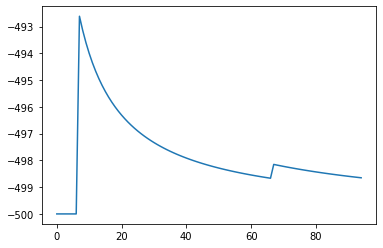

In [78]:

#random policy
#policy = lib.random()
#Q = defaultdict(lambda: np.zeros(n_actions))
mean_scores, score, moving_window, rb = store(env, 100, rb)
moving_window = moving_window[5:]
print('max',max(moving_window))
plt.plot(moving_window)
plt.show()

In [79]:
rb.sample()

(array([[ 0.93371339,  0.35802138,  0.96493876, -0.26247513,  0.10382214,
         -0.72344616],
        [ 0.92111132, -0.38929928,  0.86782932,  0.49686242, -0.40928534,
         -0.14515755],
        [ 0.92936059, -0.36917325,  0.47135475,  0.8819437 , -0.37718279,
         -0.89127144],
        [ 0.92788004, -0.37287885,  0.89142691,  0.4531645 ,  0.64666373,
         -2.53171401],
        [ 0.9687984 , -0.24785006,  0.88243203,  0.47043992, -0.54715896,
          2.01913123],
        [ 0.81730035, -0.57621188,  0.94677735,  0.32188919, -1.09724213,
          1.66724194],
        [ 0.99736751,  0.07251241,  0.77969405,  0.62616067, -1.32822081,
          1.80296631],
        [ 0.97416538, -0.2258358 ,  0.89069057,  0.45461006,  0.41559828,
         -1.38683198],
        [ 0.97221203,  0.23410204,  0.93757739, -0.3477767 , -0.8418489 ,
          0.62186422],
        [ 0.87385107,  0.48619369,  0.76888079, -0.63939215, -0.66734472,
         -0.46588841]]), array([[0],
        [0],
   